In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from joblib import dump


In [3]:
np.random.seed(101)
df = pd.read_csv('dataFrame.csv',header=0)
df['class'] = df.apply(lambda x: 0 if x['class'] == 2 else x['class'] , axis=1)
#here we remove randomly part of class 0 words
remove_n = int(len(df)*0.98)
drop_indices = np.random.choice(df.index, remove_n, replace=False)
n=[]
for i in range(0,len(drop_indices)):
    #print(drop_indices[i])
    if df.iloc[drop_indices[i]]['class']==1 or df.iloc[drop_indices[i]]['class']==2:
        #print('remove',drop_indices[i],df.iloc[drop_indices[i]]['class'])
        n.append(i)
n=np.array(n)
drop_indices=np.delete(drop_indices,n)
print('number of class 0 words removed : ',len(drop_indices))
df_subset = df.drop(drop_indices)
print('len df_subset : ',len(df_subset))

#remove words without any gaze attache to it
df_no_missing = df_subset.loc[(df_subset['number_of_gazes']!=0)]# & (df_subset['number_of_fixations']!=0)
print('len df_no_missing : ',len(df_no_missing))

df2=df_no_missing.loc[(df_no_missing['class']==1)]
#print(df2.head())

df_equal=df_no_missing.append(df2)

"""df_no_line_start=df_no_missing.loc[(df_no_missing['line_start']!=1)]
print('df_no_line_start : ',len(df_no_line_start))"""

#count the number of words with class 0, 1 and 2
seriesObj0 = df_no_missing.apply(lambda x: True if x['class'] == 0 else False , axis=1)
numOfRows0 = len(seriesObj0[seriesObj0 == True].index)
print('Number of Rows in df_no_missing with class = 0 : ', numOfRows0)
seriesObj1 = df_no_missing.apply(lambda x: True if x['class'] == 1 else False , axis=1)
numOfRows1 = len(seriesObj1[seriesObj1 == True].index)
print('Number of Rows in df_no_missing with class = 1 : ', numOfRows1)
seriesObj2 = df_no_missing.apply(lambda x: True if x['class'] == 2 else False , axis=1)
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
print('Number of Rows in df_no_missing with class = 2 : ', numOfRows2)
df = df_no_missing
print("Number in df :" ,len(df))
#df = df[["pos_y_word","number_of_fixations","total_duration_fixation_us","number_of_gazes","backward_read","max_velocity_gaze","mean_velocity_gaze","standard_deviation_velocity","max_acceleration_gaze","mean_acceleration_gaze","standard_deviation_acceleration","class"]]
df = df[["total_duration_fixation_us","number_of_gazes","mean_velocity_gaze","mean_acceleration_gaze","class"]]
#df = df.drop(['report_name','word','pos_x_word','pos_y_word','width_word','height_word','line_start'],axis=1)

number of class 0 words removed :  4252
len df_subset :  156
len df_no_missing :  155
Number of Rows in df_no_missing with class = 0 :  85
Number of Rows in df_no_missing with class = 1 :  70
Number of Rows in df_no_missing with class = 2 :  0
Number in df : 155


angle en deg parcourue par l'oeil par sec
vitesse au carré

In [4]:
df.head()

total_duration_fixation_us  number_of_gazes  mean_velocity_gaze  \
49                       483411               20           49.032802   
239                      271849                6           20.957739   
343                      211612               11          126.804995   
357                      211337               10           43.111890   
394                      331952               21           20.936570   

     mean_acceleration_gaze  class  
49              -740.650716      0  
239              -88.343983      0  
343              508.415042      0  
357             -706.919546      0  
394               29.977547      0

In [5]:
df.head()

total_duration_fixation_us  number_of_gazes  mean_velocity_gaze  \
49                       483411               20           49.032802   
239                      271849                6           20.957739   
343                      211612               11          126.804995   
357                      211337               10           43.111890   
394                      331952               21           20.936570   

     mean_acceleration_gaze  class  
49              -740.650716      0  
239              -88.343983      0  
343              508.415042      0  
357             -706.919546      0  
394               29.977547      0

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X=df.drop('class',axis=1)

Y=df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=26)
print("X_train :", len(X_train))
print("X_test :", len(X_test))
seriesObjTrain0 = Y_train.apply(lambda x: True if x == 0 else False )
print("Nb de mot compris dans les données d'entrainement :", len((seriesObjTrain0[seriesObjTrain0 == True].index)))
seriesObjTrain1 = Y_train.apply(lambda x: True if x == 1 else False )
print("Nb de mot non compris dans les données d'entrainement :", len((seriesObjTrain1[seriesObjTrain1 == True].index)))
seriesObjTrain2 = Y_train.apply(lambda x: True if x == 2 else False )
print("Nb d' auto correction dans les données d'entrainement :", len((seriesObjTrain2[seriesObjTrain2 == True].index)))

seriesObjTest0 = Y_test.apply(lambda x: True if x == 0 else False )
print("Nb de mot compris dans les données de test :", len((seriesObjTest0[seriesObjTest0 == True].index)))
seriesObjTest1 = Y_test.apply(lambda x: True if x == 1 else False )
print("Nb de mot non compris dans les données de test :", len((seriesObjTest1[seriesObjTest1 == True].index)))
seriesObjTest2 = Y_test.apply(lambda x: True if x == 2 else False )
print("Nb d'auto correction' dans les données de test :", len((seriesObjTest2[seriesObjTest2== True].index)))


X_train : 124
X_test : 31
Nb de mot compris dans les données d'entrainement : 70
Nb de mot non compris dans les données d'entrainement : 54
Nb d' auto correction dans les données d'entrainement : 0
Nb de mot compris dans les données de test : 15
Nb de mot non compris dans les données de test : 16
Nb d'auto correction' dans les données de test : 0


In [8]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8709677419354839

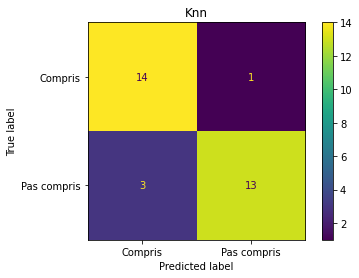

In [9]:
plot_confusion_matrix(model, X_test, Y_test, display_labels=['Compris','Pas compris'])
plt.title("Knn")

plt.savefig('confusionMatrixKnnClass.png')

In [10]:
#df.boxplot(column='line_start',by='class')
#df.boxplot(column='number_of_fixations',by='class')
#df.boxplot(column='total_duration_fixation_us',by='class')
#df.boxplot(column='number_of_gazes',by='class')
#df.boxplot(column='backward_read',by='class')
#df.boxplot(column='max_velocity_gaze',by='class')
#df.boxplot(column='mean_velocity_gaze',by='class')
#df.boxplot(column='standard_deviation_velocity',by='class')
#df.boxplot(column='max_acceleration_gaze',by='class')
#df.boxplot(column='mean_acceleration_gaze',by='class')
#df.boxplot(column='standard_deviation_acceleration',by='class')



In [11]:
from sklearn.model_selection import cross_val_score
val_score = []
for k in range(1,3):
    score = cross_val_score(KNeighborsClassifier(k),X_train,Y_train,cv=6,scoring = 'accuracy')#cv => number of split
    print(score)
    print(score.mean())

[0.71428571 0.66666667 0.61904762 0.61904762 0.7        0.85      ]
0.6948412698412697
[0.66666667 0.71428571 0.66666667 0.61904762 0.65       0.75      ]
0.6777777777777777


max score 0.7984126984126986
n_neighbors 14


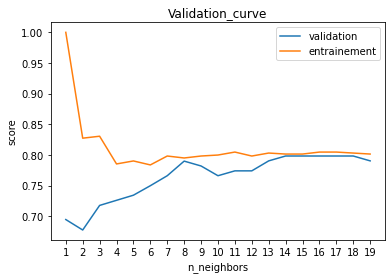

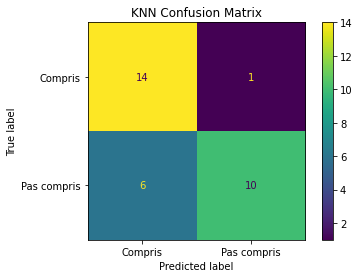

In [12]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1,20)
train_score, val_score = validation_curve(model, X_train, Y_train,param_name="n_neighbors",param_range = k,cv=6)

plt.plot(k, val_score.mean(axis=1), label="validation")
plt.plot(k, train_score.mean(axis=1), label='entrainement')
plt.xticks(k)
plt.ylabel('score')
plt.xlabel("n_neighbors")
plt.title("Validation_curve")
plt.legend()

plt.savefig('validationCurveKnnClass.png')


score = []
for elem in val_score:
    score.append(elem.mean())
    
test = KNeighborsClassifier(n_neighbors = score.index(max(score)) + 1)
test.fit(X_train,Y_train)
print("max score", max(score))
print("n_neighbors", score.index(max(score)) + 1)
plot_confusion_matrix(test, X_test, Y_test, display_labels=['Compris','Pas compris'])
plt.title("KNN Confusion Matrix")
plt.show()

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
0.8063492063492065
score test :  0.8387096774193549


['knn2classes.joblib']

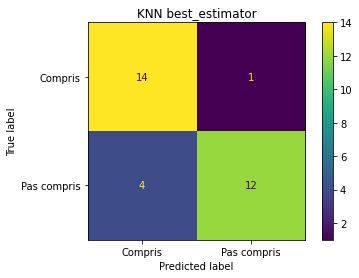

In [13]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'n_neighbors' : np.arange(1,20), 'metric' : ['euclidean','manhattan','minkowski']}
param_grid = {'n_neighbors' : np.arange(1,20), 'metric' : ['euclidean','manhattan','minkowski'],'algorithm' : ["auto", "ball_tree", "kd_tree", "brute"],'weights' :['uniform', 'distance'] }

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=6)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
model2 = grid.best_estimator_
print("score test : ",model2.score(X_test,Y_test))
plot_confusion_matrix(model2, X_test, Y_test, display_labels=['Compris','Pas compris'])
plt.title("KNN best_estimator")

plt.savefig('confusionMatrixGridKnnClass.png')
dump(model2, 'knn2classes.joblib')


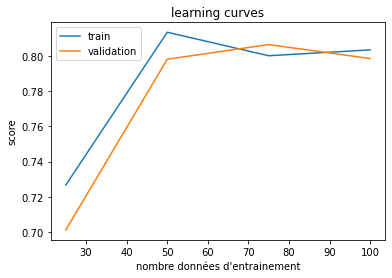

In [14]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model2,X_train,Y_train, 
                                           train_sizes = [25,50,75,100],
                                           cv = 6)
#print(N)
plt.plot(N, train_score.mean(axis=1),label = 'train')
plt.plot(N, val_score.mean(axis=1),label = 'validation')
plt.xlabel("nombre données d'entrainement")
plt.ylabel("score")
plt.title("learning curves")
plt.legend()
plt.savefig('learingCurveKnnClass.png')

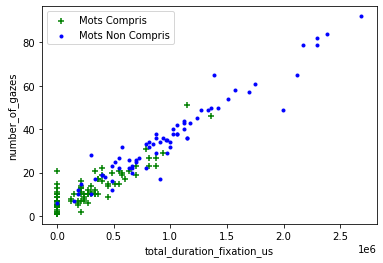

In [15]:
df0 = df[(df['class'] == 0)]
df1 = df[(df['class'] == 1)]

plt.xlabel('total_duration_fixation_us')
plt.ylabel('number_of_gazes')
plt.scatter(df0['total_duration_fixation_us'], df0['number_of_gazes'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['total_duration_fixation_us'], df1['number_of_gazes'],color="blue",marker='.',label = "Mots Non Compris")
plt.legend()


In [16]:
"""
plt.xlabel('total_duration_fixation_us')
plt.ylabel('number_of_fixations')
plt.scatter(df0['total_duration_fixation_us'], df0['number_of_fixations'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['total_duration_fixation_us'], df1['number_of_fixations'],color="blue",marker='.',label = "Mots Non Compris")
plt.legend()
"""

'\nplt.xlabel(\'total_duration_fixation_us\')\nplt.ylabel(\'number_of_fixations\')\nplt.scatter(df0[\'total_duration_fixation_us\'], df0[\'number_of_fixations\'],color="green",marker=\'+\',label = "Mots Compris")\nplt.scatter(df1[\'total_duration_fixation_us\'], df1[\'number_of_fixations\'],color="blue",marker=\'.\',label = "Mots Non Compris")\nplt.legend()\n'

In [17]:
"""
plt.xlabel('total_duration_fixation_us')
plt.ylabel('number_of_fixations')
plt.scatter(df0['total_duration_fixation_us'], df0['number_of_fixations'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['total_duration_fixation_us'], df1['number_of_fixations'],color="blue",marker='.',label = "Mots Non Compris")
"""

'\nplt.xlabel(\'total_duration_fixation_us\')\nplt.ylabel(\'number_of_fixations\')\nplt.scatter(df0[\'total_duration_fixation_us\'], df0[\'number_of_fixations\'],color="green",marker=\'+\',label = "Mots Compris")\nplt.scatter(df1[\'total_duration_fixation_us\'], df1[\'number_of_fixations\'],color="blue",marker=\'.\',label = "Mots Non Compris")\n'

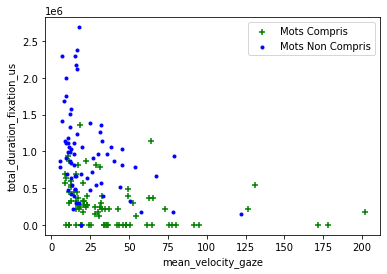

In [18]:
plt.xlabel('mean_velocity_gaze')
plt.ylabel('total_duration_fixation_us')
plt.scatter(df0['mean_velocity_gaze'], df0['total_duration_fixation_us'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['mean_velocity_gaze'], df1['total_duration_fixation_us'],color="blue",marker='.',label = "Mots Non Compris")
plt.legend()

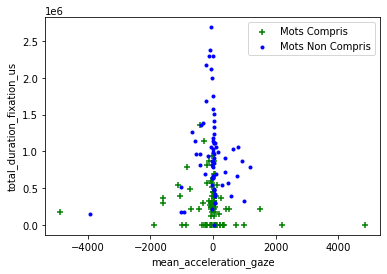

In [19]:
plt.xlabel('mean_acceleration_gaze')
plt.ylabel('total_duration_fixation_us')
plt.scatter(df0['mean_acceleration_gaze'], df0['total_duration_fixation_us'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['mean_acceleration_gaze'], df1['total_duration_fixation_us'],color="blue",marker='.',label = "Mots Non Compris")
plt.legend()

<AxesSubplot:xlabel='total_duration_fixation_us', ylabel='Density'>

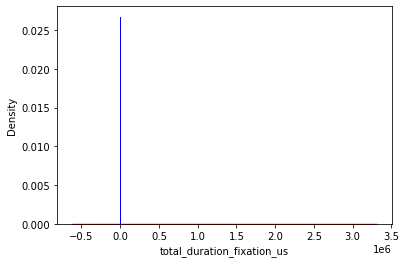

In [20]:
import seaborn as sb 

sb.kdeplot(df['total_duration_fixation_us'], color = 'r', shade = True, label = 'total_duration_fixation_us')
sb.kdeplot(df['number_of_gazes'], color = 'b', shade = True, label = 'number_of_gazes')



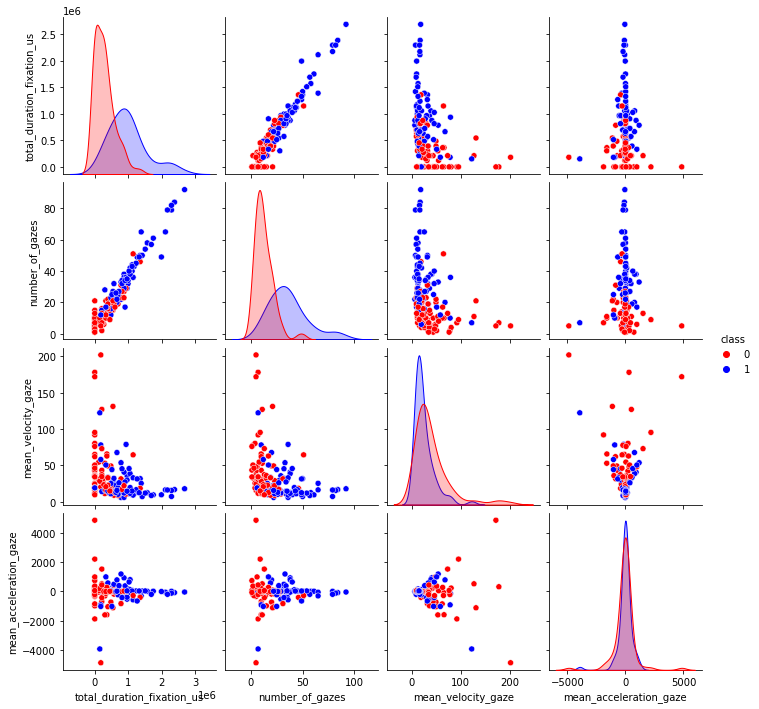

In [21]:
sb.pairplot(data = df, hue = 'class', palette = ['Red', 'Blue'],height=2.5)
plt.savefig('pairplotKnnClass.png')

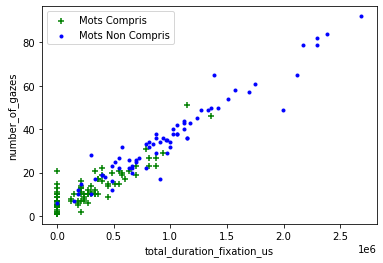

In [22]:
df0 = df[(df['class'] == 0)]
df1 = df[(df['class'] == 1)]

plt.xlabel('total_duration_fixation_us')
plt.ylabel('number_of_gazes')
plt.scatter(df0['total_duration_fixation_us'], df0['number_of_gazes'],color="green",marker='+',label = "Mots Compris")
plt.scatter(df1['total_duration_fixation_us'], df1['number_of_gazes'],color="blue",marker='.',label = "Mots Non Compris")
plt.legend()


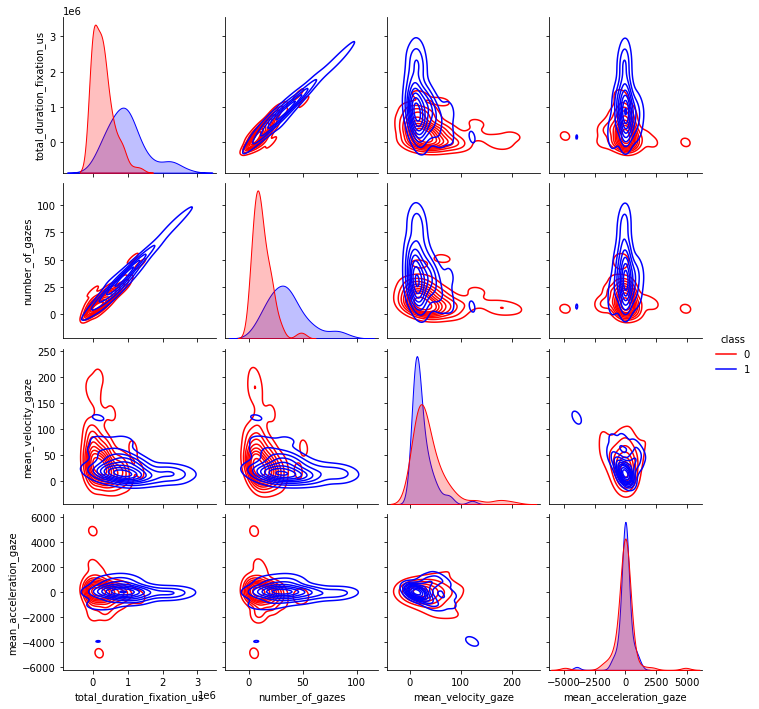

In [23]:
sb.pairplot(df, hue = 'class', palette = ['Red', 'Blue'], kind="kde")


